# Atividade Pratica 1

In [1]:
import pandas as pd # para trabalhar com data frames
import seaborn as srn # trabalha com gráficos
import statistics  as sts # trabalha com estatistica

In [33]:
#importar dados
dataset = pd.read_csv("C:\\Users\\vitor\\OneDrive\\Documentos\\Desenvolvimento\Python\DATA_SCIENCE\\01. Tratamento de Dados\\dados\\tempo.csv", sep=";")
#visulizar
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [3]:
#tamanho
dataset.shape # (linhas, colunas)

(14, 5)

In [4]:
#explorar dados categoricos
#Aparencia
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<AxesSubplot:xlabel='Aparencia'>

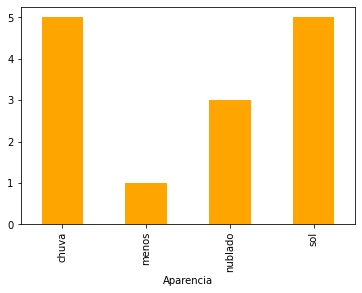

In [5]:
agrupado.plot.bar(color = 'orange')

In [6]:
#Vento
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<AxesSubplot:xlabel='Vento'>

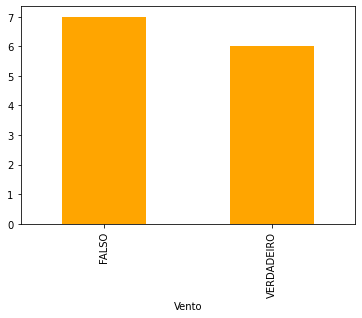

In [7]:
agrupado.plot.bar(color = 'orange')

In [8]:
#Jogar
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

<AxesSubplot:xlabel='Jogar'>

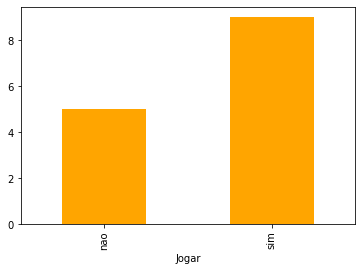

In [9]:
agrupado.plot.bar(color = 'orange')

In [10]:
#explorar colunas numéricas
#Temperatura
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

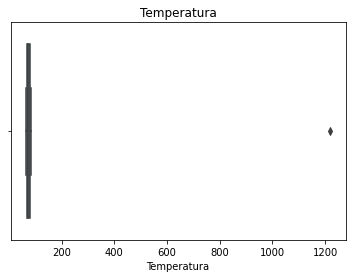

In [11]:
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

Text(0.5, 1.0, 'Temperatura')

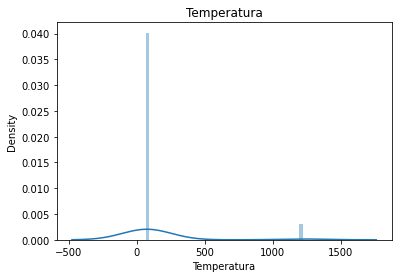

In [12]:
srn.distplot(dataset['Temperatura']).set_title('Temperatura')

In [13]:
#Umidade
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

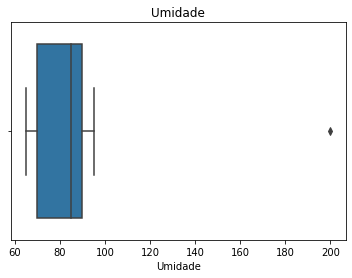

In [14]:
srn.boxplot(dataset['Umidade']).set_title('Umidade')

Text(0.5, 1.0, 'Umidade')

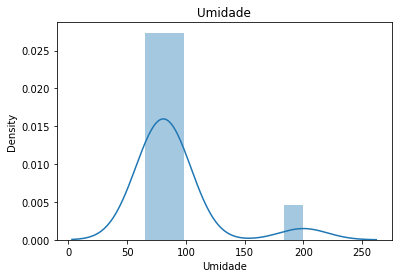

In [15]:
srn.distplot(dataset['Umidade']).set_title('Umidade')

In [16]:
#Aparencia fora do domínio
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [17]:
#atribuomos sol ou chuva (moda)
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = "chuva"
agrupado = dataset.groupby(['Aparencia']).size()
#verificamos o resultado
agrupado

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64

In [18]:
#contamos valores NAN
#Umidade e Vento
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [19]:
#Vento
#remover nas e substiutir pela moda
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [20]:
#substituir NAN por mediana
dataset['Vento'].fillna("FALSO", inplace=True)
dataset['Vento'].isnull().sum()

0

In [21]:
#Verificando
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         8
VERDADEIRO    6
dtype: int64

In [22]:
#Umidade
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [23]:
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [24]:
dataset['Umidade'].fillna(mediana, inplace=True)
dataset['Umidade'].isnull().sum()

0

In [25]:
#visualizar 
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75,200.0,FALSO,sim


In [26]:
#substituir
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100), 'Umidade'] = mediana

In [27]:
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [28]:
#visualizar
#Temperatura  
dataset.loc[(dataset['Temperatura'] < -135 )  | ( dataset['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [29]:
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [30]:
#substituir
dataset.loc[(dataset['Temperatura'] <  0 )  | ( dataset['Temperatura'] >  100), 'Temperatura'] = mediana

In [31]:
dataset.loc[(dataset['Temperatura'] < -135 )  | ( dataset['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [32]:
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
